# DiploDatos 2019 - Análisis y Visualización
En este práctico se propone explorar un dataset que contiene información de varias agencias de correo de Brasil, con el objetivo de extraer toda la información relevante sobre estos datos y presentarla de manera organizada y sencilla.
En estos datos vamos a encontrar información geográfica de los compradores y vendedores, el tipo de servicio por el que viajan los paquetes, el estado del paquete, algunas fechas relevantes y la cantidad de días hábiles que tardó el envío en llegar a su destino (target).

## Definiciones

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

cols = ['service',
        'sender_zipcode',
        'receiver_zipcode',
        'sender_state',
        'receiver_state',
        'shipment_type',
        'quantity',
        'status',
        'date_created',
        'date_sent',
        'date_visit',
        'target']
cols_holidays = ['holiday', 
                 'description']
data_path = './shipments_BR_201903.csv'
holidays = './holidays.csv'

### Datos
Los datos que vamos a cargar son un sample no uniforme que corresponde al mes de Marzo de 2019.

In [2]:
df = pd.read_csv(data_path, usecols=cols)
df.shape

(1000000, 12)

In [3]:
df.head()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4


#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.


#### Feriados

In [4]:
df_h = pd.read_csv(holidays, usecols=cols_holidays)
df_h.shape

(26, 2)

In [5]:
df_h.sample(5)

,holiday,description
10,2019-06-04,Dia Mundial do Meio Ambiente
5,2019-02-13,Carnaval
19,2019-07-08,Data Magna do Estado de São Paulo
2,2019-01-24,[Feriado Municipal] Aniversário da Cidade conf...
13,2019-11-19,Dia da Consciência Negra


# Información general

Cantidad y proporción de envíos, servicios, tipos de envíos y rutas(consideramos como ruta la tripla zipcode, zipcode, servicio).

#### el numero de filas es el numero de envios, sacar la mayor cantidad de info que podamos, la proporcion es por 6 meses ver por 1mes

In [6]:
df['service'].value_counts()

1     501509
0     321839
4      58517
2      49185
3      22057
5      20116
6      17602
8       5288
9       3224
7        528
10       134
11         1
Name: service, dtype: int64

In [7]:
df['service'].value_counts(normalize=True)

1     0.501509
0     0.321839
4     0.058517
2     0.049185
3     0.022057
5     0.020116
6     0.017602
8     0.005288
9     0.003224
7     0.000528
10    0.000134
11    0.000001
Name: service, dtype: float64

In [8]:
df['shipment_type'].value_counts()

standard    593467
express     394600
super        11933
Name: shipment_type, dtype: int64

In [9]:
df['shipment_type'].value_counts(normalize=True)

standard    0.593467
express     0.394600
super       0.011933
Name: shipment_type, dtype: float64

In [10]:
df['ruta']=df['sender_zipcode'].astype('str')+'-'+df['receiver_zipcode'].astype('str')+'-'+df['service'].astype('str')

In [11]:
df['ruta'].value_counts()

6422-28943-0     69
6422-95095-0     56
5206-5203-0      51
37165-37165-0    41
3728-3727-0      35
9260-9280-0      32
2523-2523-0      29
9520-9520-0      29
6422-16015-0     29
9195-9606-0      28
14940-14940-0    28
14402-14403-0    26
1207-1207-0      24
6422-17050-0     24
13290-13212-6    23
6422-26510-0     21
6422-7092-0      21
14400-14400-0    20
6422-41650-0     20
6422-87370-0     20
6422-49160-0     20
14401-14401-0    20
13290-35162-6    20
13290-38400-6    19
13290-39400-6    18
39500-39500-0    17
13290-13481-6    17
6422-45602-0     17
1033-6854-0      17
13290-13214-6    17
                 ..
83326-35240-1     1
35790-3730-1      1
30510-96030-0     1
1026-30530-0      1
9080-81200-4      1
9321-68373-1      1
6040-68904-1      1
9230-14402-1      1
35519-5270-1      1
5138-89107-1      1
30190-88053-0     1
1411-40080-0      1
6422-69092-2      1
29167-19906-1     1
17730-34710-1     1
8550-25011-2      1
2030-38030-2      1
3658-6184-5       1
4534-8260-0       1


In [12]:
df['ruta'].value_counts(normalize=True)

6422-28943-0     0.000069
6422-95095-0     0.000056
5206-5203-0      0.000051
37165-37165-0    0.000041
3728-3727-0      0.000035
9260-9280-0      0.000032
2523-2523-0      0.000029
9520-9520-0      0.000029
6422-16015-0     0.000029
9195-9606-0      0.000028
14940-14940-0    0.000028
14402-14403-0    0.000026
1207-1207-0      0.000024
6422-17050-0     0.000024
13290-13212-6    0.000023
6422-26510-0     0.000021
6422-7092-0      0.000021
14400-14400-0    0.000020
6422-41650-0     0.000020
6422-87370-0     0.000020
6422-49160-0     0.000020
14401-14401-0    0.000020
13290-35162-6    0.000020
13290-38400-6    0.000019
13290-39400-6    0.000018
39500-39500-0    0.000017
13290-13481-6    0.000017
6422-45602-0     0.000017
1033-6854-0      0.000017
13290-13214-6    0.000017
                   ...   
83326-35240-1    0.000001
35790-3730-1     0.000001
30510-96030-0    0.000001
1026-30530-0     0.000001
9080-81200-4     0.000001
9321-68373-1     0.000001
6040-68904-1     0.000001
9230-14402-1

Puntos máximos y mínimos de cada feature

In [13]:
df.max()

sender_state                         TO
sender_zipcode                    99990
receiver_state                       TO
receiver_zipcode                  99990
shipment_type                     super
quantity                              5
service                              11
status                             sent
date_created        2019-06-28 00:00:00
date_sent           2019-03-29 07:06:00
date_visit          2019-03-29 23:31:00
target                              118
ruta                      99990-44790-1
dtype: object

In [14]:
df.min()

sender_state                         AC
sender_zipcode                     1001
receiver_state                       AC
receiver_zipcode                   1001
shipment_type                   express
quantity                              1
service                               0
status                        cancelled
date_created        2018-09-26 00:00:00
date_sent           2018-10-01 16:55:00
date_visit          2019-02-28 00:03:00
target                                0
ruta                       1001-11065-0
dtype: object

In [15]:
df['target'].describe()

count    1000000.000000
mean           6.021577
std            5.157973
min            0.000000
25%            2.000000
50%            4.000000
75%            9.000000
max          118.000000
Name: target, dtype: float64

In [16]:
(df['target'].max()-df['target'].min())/2

59.0

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

/home/isanti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


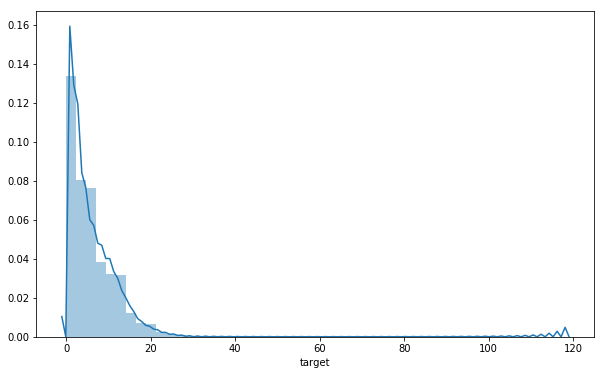

In [18]:
plt.figure(figsize=(10,6))
sb.distplot(df['target'])

(array([1.80655e+05, 1.35145e+05, 1.07500e+05, 8.22500e+04, 6.87900e+04,
        1.11092e+05, 4.79370e+04, 4.23760e+04, 4.04610e+04, 3.58210e+04,
        3.02150e+04, 4.49210e+04, 1.62410e+04, 1.21330e+04, 9.72400e+03,
        7.34000e+03, 1.09140e+04, 4.01400e+03, 3.00800e+03, 2.30000e+03,
        1.76600e+03, 1.33400e+03, 1.78200e+03, 5.04000e+02, 3.70000e+02,
        2.33000e+02, 2.19000e+02, 2.97000e+02, 1.17000e+02, 9.40000e+01,
        7.10000e+01, 6.20000e+01, 5.90000e+01, 8.10000e+01, 1.70000e+01,
        1.80000e+01, 1.60000e+01, 2.20000e+01, 2.00000e+01, 1.10000e+01,
        1.30000e+01, 7.00000e+00, 3.00000e+00, 2.00000e+00, 8.00000e+00,
        5.00000e+00, 7.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

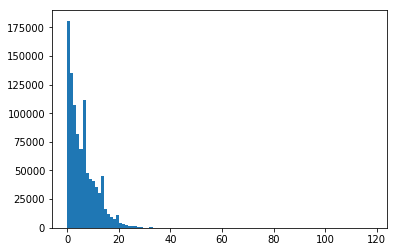

In [ ]:
plt.hist(df['target'],bins=100)

In [ ]:
a=df[df['target']<40]

In [ ]:
plt.figure(figsize=(10,6))
sb.distplot(a)

# Conclusion